# Supervised Learning Classification Project: AllLife Bank Personal Loan Campaign

## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

## Loading the dataset

In [2]:
df = pd.read_csv('Loan_Modelling.csv')
df.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


## Data Overview

* Observations
* Sanity checks

In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93169.257000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,1759.455086,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,90005.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


There is no null (missing) records.

But, wait a minute: What is that negative value in the Experience column?

In [4]:
df[df['Experience'] < 0]

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
89,90,25,-1,113,94303,4,2.30,3,0,0,0,0,0,1
226,227,24,-1,39,94085,2,1.70,2,0,0,0,0,0,0
315,316,24,-2,51,90630,3,0.30,3,0,0,0,0,1,0
451,452,28,-2,48,94132,2,1.75,3,89,0,0,0,1,0
524,525,24,-1,75,93014,4,0.20,1,0,0,0,0,1,0
536,537,25,-1,43,92173,3,2.40,2,176,0,0,0,1,0
540,541,25,-1,109,94010,4,2.30,3,314,0,0,0,1,0
576,577,25,-1,48,92870,3,0.30,3,0,0,0,0,0,1
583,584,24,-1,38,95045,2,1.70,2,0,0,0,0,1,0
597,598,24,-2,125,92835,2,7.20,1,0,0,1,0,0,1


There are 52 records out of 5000 having this abnormal experience, roughly 1% of the total records. They are into the following pattern:

* All of them are young - between 23 and 29 years old (i.e. they are all younger than 30s)
* None of them have any CD accounts
* None of them accepted any previous personal loan offers
* Everything else seems normally distributed

There are a few ways to deal with this:

* Drop these records
* Replace them with the mean or median value
* Make the negative become positive

Since there are only 3 distinct negative values (-1, -2, -3), and all of them are with customers under 30 years old, we can safely assume that this is indeed a data entry error. Therefore, we will go with the third option. This is to be done in the next section.

#### Data Cleaning

First, let us fix the negative values in the Experience column.

In [5]:
df['Experience'] = df['Experience'].abs()

According to the data directory, there are some fields that are categorical in nature, but was imported as int64. We will convert them to categorical data type.

We also want to make the "Family" column to have a categorical version. This is because the number of family members is not a continuous variable, but a discrete one. We will make a new column called "Family_Size" to represent this.

In [6]:
for col in df[['ZIPCode', 'Education', 'Personal_Loan', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard']]:
    df[col] = pd.Categorical(df[col])

df['Family_Size'] = df['Family'].astype('category')

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   ID                  5000 non-null   int64   
 1   Age                 5000 non-null   int64   
 2   Experience          5000 non-null   int64   
 3   Income              5000 non-null   int64   
 4   ZIPCode             5000 non-null   category
 5   Family              5000 non-null   int64   
 6   CCAvg               5000 non-null   float64 
 7   Education           5000 non-null   category
 8   Mortgage            5000 non-null   int64   
 9   Personal_Loan       5000 non-null   category
 10  Securities_Account  5000 non-null   category
 11  CD_Account          5000 non-null   category
 12  Online              5000 non-null   category
 13  CreditCard          5000 non-null   category
 14  Family_Size         5000 non-null   category
dtypes: category(8), float64(1), int64(6)
m

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,Family_Size
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,4
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0,3
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0,1
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0,1
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,4


## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

### Univariate Analysis

Let's start with looking at ID and see if it's the unique identifier.

In [7]:
df.ID.nunique()

5000

The ID column is indeed the unique identifier, so we will use it as the index.

In [8]:
df.set_index('ID', inplace=True)
df.head()

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,Family_Size
ID,,,,,,,,,,,,,,
1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,4
2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0,3
3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0,1
4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0,1
5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,4


Let's look at all the numerical columns.

In [9]:
df.describe()

,Age,Experience,Income,Family,CCAvg,Mortgage
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,45.338400,20.134600,73.774200,2.396400,1.937938,56.498800
std,11.463166,11.415189,46.033729,1.147663,1.747659,101.713802
min,23.000000,0.000000,8.000000,1.000000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,1.000000,0.700000,0.000000
50%,45.000000,20.000000,64.000000,2.000000,1.500000,0.000000
75%,55.000000,30.000000,98.000000,3.000000,2.500000,101.000000
max,67.000000,43.000000,224.000000,4.000000,10.000000,635.000000


Let us plot the distribution of each numerical column. Let us use a series of subplots, with first column being the histogram and the second column being the boxplot.

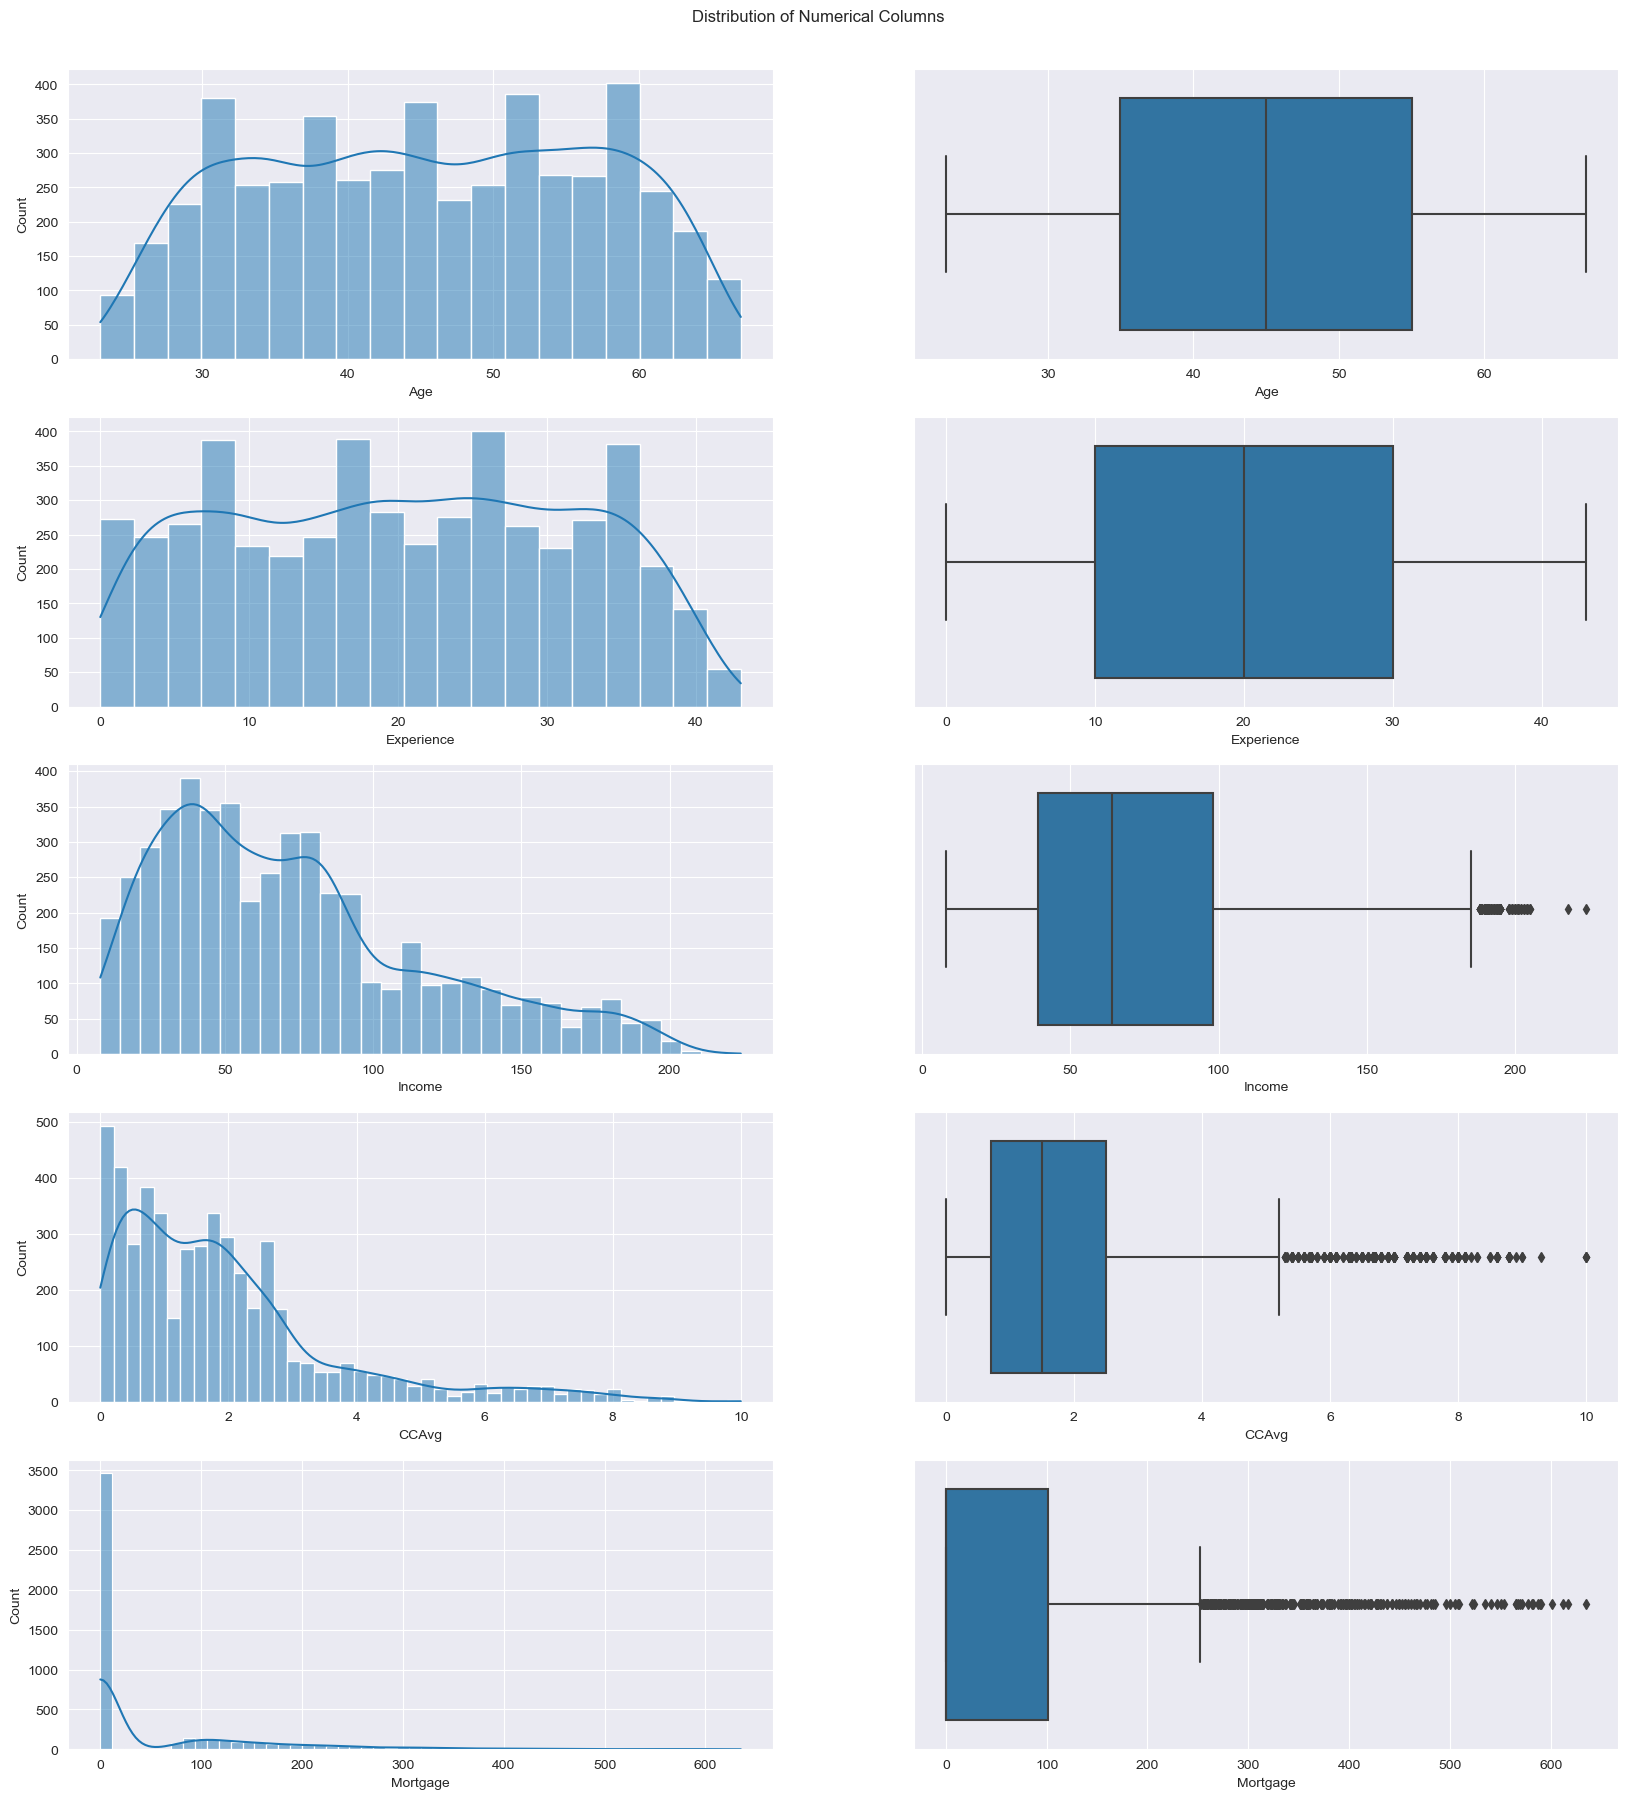

In [10]:
fig, axes = plt.subplots(5, 2, figsize=(20, 20))
fig.suptitle('Distribution of Numerical Columns')
sns.histplot(data=df, x='Age', kde=True, ax=axes[0, 0])
sns.boxplot(data=df, x='Age', ax=axes[0, 1])
sns.histplot(data=df, x='Experience', kde=True, ax=axes[1, 0])
sns.boxplot(data=df, x='Experience', ax=axes[1, 1])
sns.histplot(data=df, x='Income', kde=True, ax=axes[2, 0])
sns.boxplot(data=df, x='Income', ax=axes[2, 1])
sns.histplot(data=df, x='CCAvg', kde=True, ax=axes[3, 0])
sns.boxplot(data=df, x='CCAvg', ax=axes[3, 1])
sns.histplot(data=df, x='Mortgage', kde=True, ax=axes[4, 0])
sns.boxplot(data=df, x='Mortgage', ax=axes[4, 1])
plt.subplots_adjust(top=0.95)
plt.show()

**Observations**:

* Age and Experience are normally distributed, with a slight right skew.
* Income is right skewed, with a few outliers.
* CCAvg is also right skewed, with more outliers.
* Mortgage is heavily right skewed, with a lot of outliers.

The reason that Mortgage has so many outliners is that, most people do not have a mortgage. Only a few people have a mortgage, and those who do have a mortgage, have a large mortgage. This is why the distribution is so skewed.

Since there are so many customers without a mortgage, we will create a new categorical column to represent this.

In [26]:
# Let us 2 new categorical columns
# - "have_mortgage" (categorical, 0 as no, including all rows having Mortgage=0, and 1 as yes, including all rows having Mortgage > 0)

df['have_mortgage'] = df['Mortgage'].apply(lambda x: 0 if x == 0 else 1).astype('category')

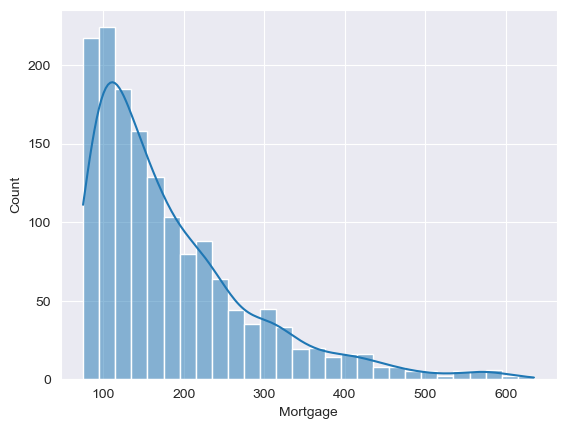

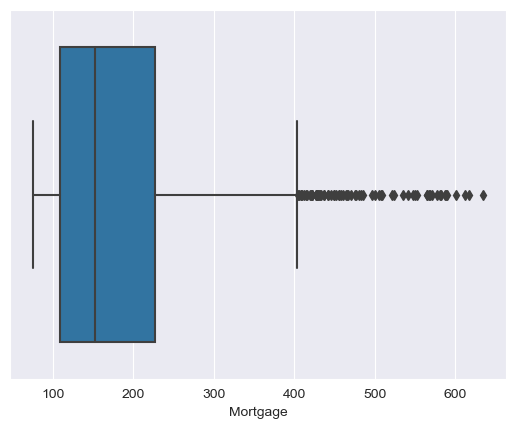

count    1538.000000
mean      183.676203
std       101.361226
min        75.000000
25%       109.000000
50%       153.000000
75%       227.000000
max       635.000000
Name: Mortgage, dtype: float64

In [27]:
# Now, let's plot the mortgage amount distribution
nonzero_mortgage = df[df['Mortgage'] > 0]
sns.histplot(data=nonzero_mortgage, x='Mortgage', kde=True)
plt.show()
sns.boxplot(data=nonzero_mortgage, x='Mortgage')
plt.show()
nonzero_mortgage.Mortgage.describe()

Among customers that actually has a mortgage, the distribution is still heavily right skewed, with a lot of outliners, but not as severe as before.

Let us look at the distribution of the categorical columns. We will use subplots again, showing 2 column, with each panel representing a different categorical column.

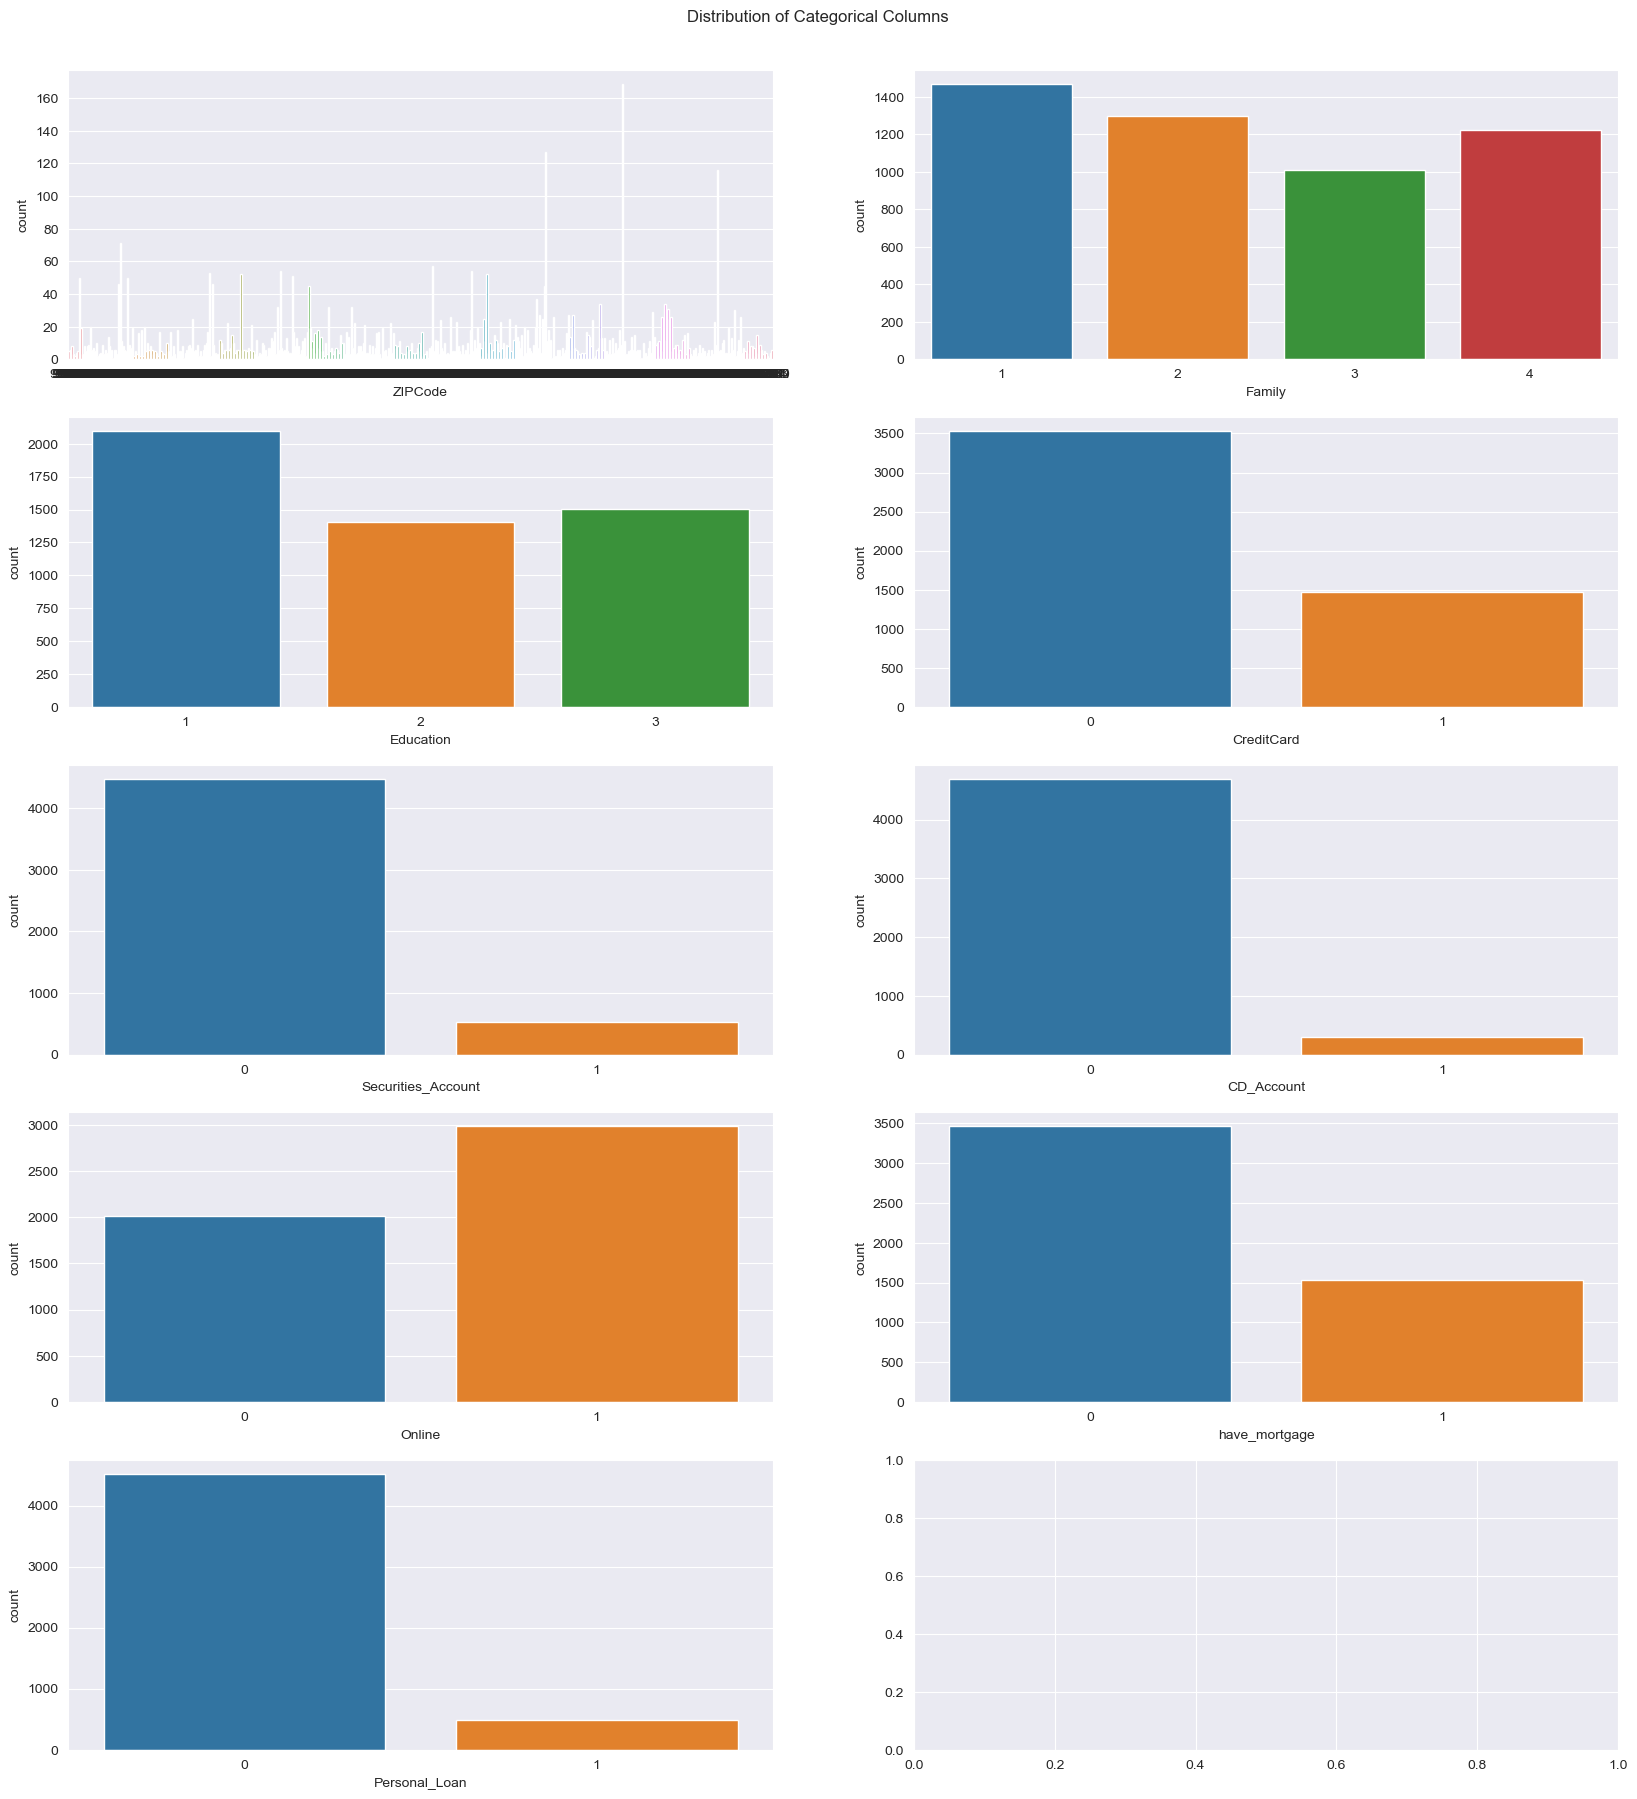

In [17]:
fig, axes = plt.subplots(5, 2, figsize=(20, 20))
fig.suptitle('Distribution of Categorical Columns')
sns.countplot(data=df, x='ZIPCode', ax=axes[0,0])
sns.countplot(data=df, x='Family', ax=axes[0,1])
sns.countplot(data=df, x='Education', ax=axes[1,0])
sns.countplot(data=df, x='CreditCard', ax=axes[1,1])
sns.countplot(data=df, x='Securities_Account', ax=axes[2,0])
sns.countplot(data=df, x='CD_Account', ax=axes[2,1])
sns.countplot(data=df, x='Online', ax=axes[3,0])
sns.countplot(data=df, x='have_mortgage', ax=axes[3,1])
sns.countplot(data=df, x='Personal_Loan', ax=axes[4,0])
plt.subplots_adjust(top=0.95)
plt.show()

**Observations**:

* ZIPCode has a large distribution, with some ZIPCode having a lot of customers. It means that the bank has more customers in certain ZIPCodes. However, until we look at multivariate analysis, we do not know how it would affect the personal loan choice.
* Family size is somewhat evenly distributed, with most customers having 1 or 4 family members.
* For Education, this bank has more customers with undergraduate degrees (but not overwhelmingly so).
* More customers use online banking than not. This probably have a little bit correlation with the age of the customers, we will verify that later.
* More customers have credit cards outside of AllLife bank than not.
* Most customers do not have a securities account or a CD account.
* As suspected, most customers do not have a mortgage.
* Most customers did not accept the personal loan offer in the previous campaign.

Now let's do some numerical analysis on categorical fields.

In [18]:
# find out the count of each category in each categorical column
for col in df[['ZIPCode', 'Family', 'Education', 'Personal_Loan', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'have_mortgage']]:
    # print(df[col].value_counts())
    vc = df[col].value_counts()
    pers = df[col].value_counts(normalize=True).mul(100).round(2).astype(str) + '%'
    print(pd.DataFrame({'count': vc, '%': pers}))

         count      %
ZIPCode              
94720      169  3.38%
94305      127  2.54%
95616      116  2.32%
90095       71  1.42%
93106       57  1.14%
...        ...    ...
93077        1  0.02%
94965        1  0.02%
90068        1  0.02%
94970        1  0.02%
91024        1  0.02%

[467 rows x 2 columns]
        count       %
Family               
1        1472  29.44%
2        1296  25.92%
4        1222  24.44%
3        1010   20.2%
           count       %
Education               
1           2096  41.92%
3           1501  30.02%
2           1403  28.06%
               count      %
Personal_Loan              
0               4520  90.4%
1                480   9.6%
                    count       %
Securities_Account               
0                    4478  89.56%
1                     522  10.44%
            count       %
CD_Account               
0            4698  93.96%
1             302   6.04%
        count       %
Online               
1        2984  59.68%
0        2016  

#### Multivariate Analysis

First, let us look at the heatmap of the correlation matrix.

<Axes: >

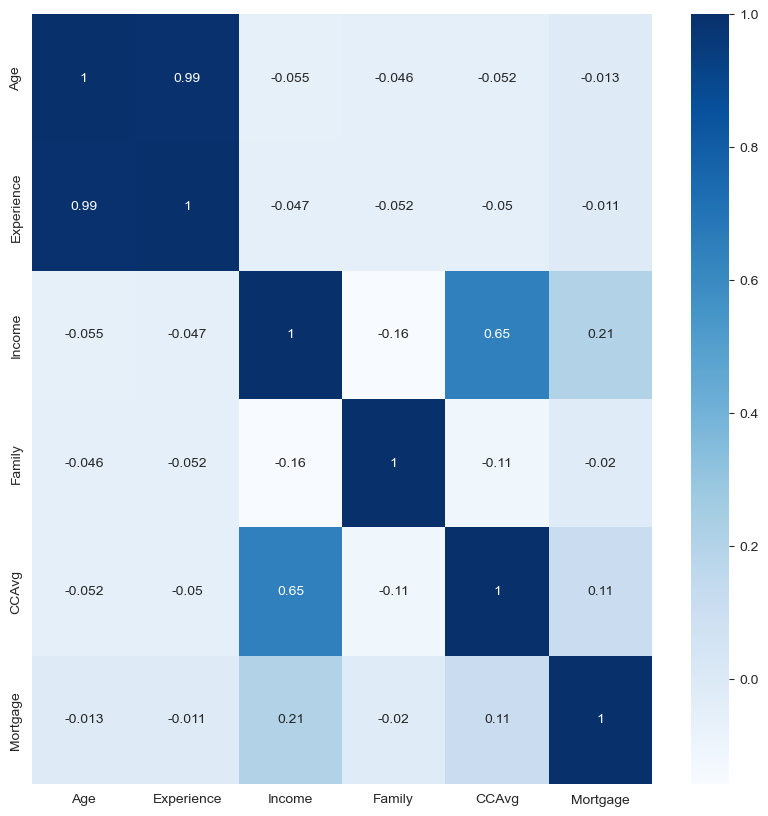

In [31]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='Blues')

**Observations**:

- Age and Experience are highly correlated, which makes sense, because the more experience you have, the older you are.
- Income and CCAvg are also correlated (though not too strong), which makes sense, because the more you earn, the more you can spend; and, higher income people tend to have higher credit score, which means they can get higher credit limit.

Now let us look at the correlation between the target attribute (Personal_Loan) and other attributes.+

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

In [29]:
df[df.Mortgage > 0].Mortgage.describe()

count    1538.000000
mean      183.676203
std       101.361226
min        75.000000
25%       109.000000
50%       153.000000
75%       227.000000
max       635.000000
Name: Mortgage, dtype: float64

Ans:
1. For mortgages, referring to above, there are close to 70% of customers do not have a mortgage. The rest of the customers have a mortgage, and the distribution is heavily right skewed, with a lot of outliers. The minimum mortgage amount is 75k. Interestingly, if we use the original Mortgage column unmodified, the stats would be much different, because it would include a bunch of 0 (no mortgage), and a big gap between 0 and 75k. This is why we created the "have_mortgage" column, to better represent the distribution of mortgage amount.

In [30]:
df.CreditCard.value_counts()

CreditCard
0    3530
1    1470
Name: count, dtype: int64

Ans 2: 1470 customers (29.4%) have credit cards outside of AllLife bank.

## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

## Model Building

### Model Evaluation Criterion

* 


### Model Building

### Model Performance Improvement

## Model Comparison and Final Model Selection

## Actionable Insights and Business Recommendations


* What recommedations would you suggest to the bank?

___